# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()   # Splitting 50000 images for training , 10000 for testing

Using TensorFlow backend.


In [3]:
# Classes in the dataset are

classes = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships","trucks"]

# Visualising data

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

--> Images

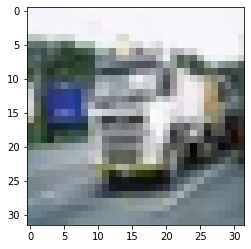

In [8]:
plt.imshow(X_train[1000])

In [9]:
y_train[1000]

array([9], dtype=uint8)

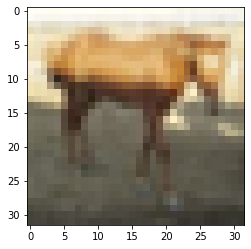

In [10]:
plt.imshow(X_train[2000])

In [11]:
y_train[2000]

array([7], dtype=uint8)

In [12]:
classes[7]

'horses'

/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


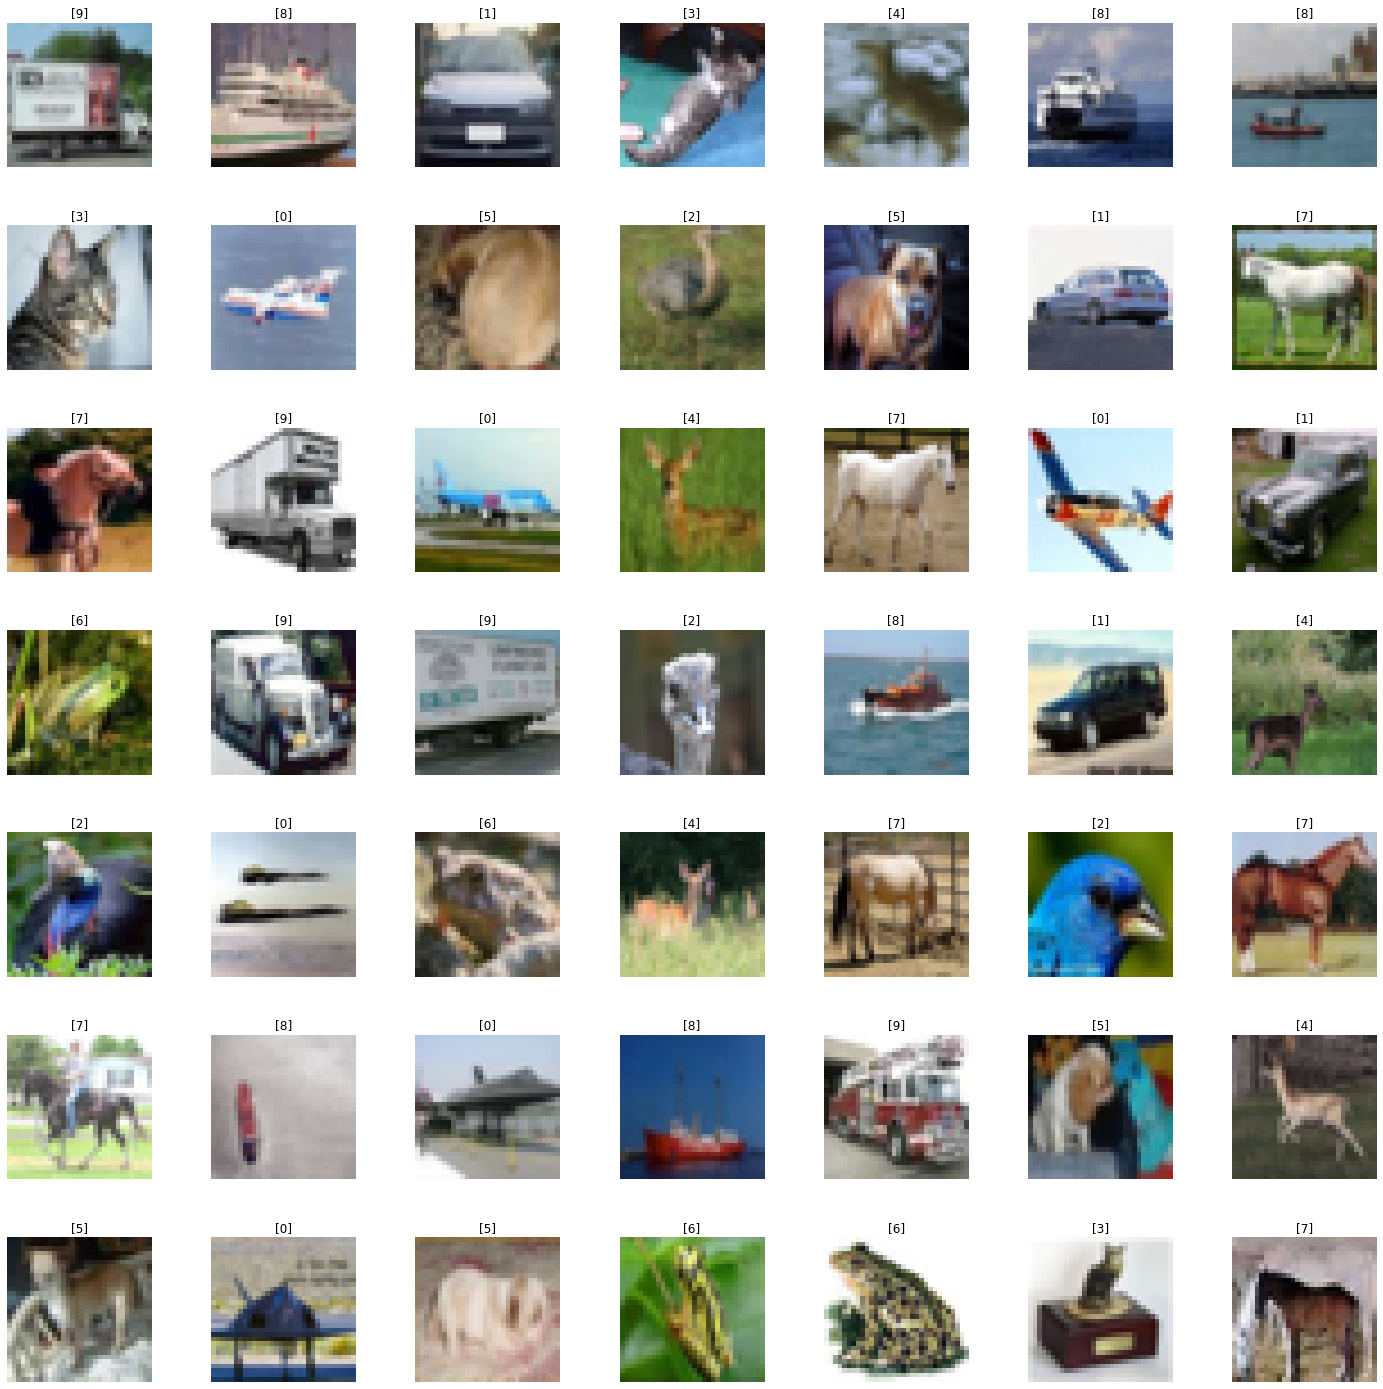

In [13]:
# Printing multiple images

fig , axes = plt.subplots(nrows=7 , ncols=7 , figsize=(25,25))
axes = axes.ravel()  # Converts matrix into 1D array

for i in np.arange(0,49):
    index = np.random.randint(0,len(X_train))  # Pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])  # prints label coresponding to image
    axes[i].axis('off')  # Removing axes for images. 
    
plt.subplots_adjust(hspace=0.4)  # Expanding space between images

# Data Preparation

Step_1 --> Converting input images to floats

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Step_2 --> One hot encoding target classes (y_train , y_test)

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
import keras

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [17]:
y_train.shape

(50000, 10)

Step_3 --> Normalising input features

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

# Model Building

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
cnn_model = Sequential()  # Initiating topology of network

# Adding convolution layer - 1
cnn_model.add(Conv2D(filters = 32 , kernel_size=(3,3) , activation = 'relu' , input_shape = Input_shape))

# Adding convolution layer - 2
cnn_model.add(Conv2D(filters = 32 , kernel_size=(3,3) , activation = 'relu'))

# Adding Maxpooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Addding dropout layer to regularise the model
cnn_model.add(Dropout(0.5))


# Creating deep network by adding more convolution , maxpooling and dropout layers. 
cnn_model.add(Conv2D(filters = 64 , kernel_size=(3,3) , activation = 'relu'))
cnn_model.add(Conv2D(filters = 64 , kernel_size=(3,3) , activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.5))

# Adding flattening layer
cnn_model.add(Flatten())  # Converts data into a 1D array

# Creating fully connected network
cnn_model.add(Dense(units=512 , activation='relu'))
cnn_model.add(Dense(units=512 , activation='relu'))


# Finally adding output layer
cnn_model.add(Dense(units=10 , activation='softmax'))  # since this is a classification task, we use softmax activation function.

W0731 05:00:35.993003 140517141088064 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:72: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 05:00:36.013987 140517141088064 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:515: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 05:00:36.016930 140517141088064 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4048: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0731 05:00:36.050061 140517141088064 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3878: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0731 05:00:36.0527

In [24]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

# Compiling model

In [25]:
cnn_model.compile(loss='categorical_crossentropy' , optimizer=keras.optimizers.rmsprop(lr=0.001) , metrics=['accuracy'])

W0731 05:00:36.254948 140517141088064 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/optimizers.py:782: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0731 05:00:36.264234 140517141088064 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3218: The name tf.log is deprecated. Please use tf.math.log instead.



# Training the model

In [26]:
history = cnn_model.fit(X_train , y_train , batch_size=32 , epochs=10 , shuffle=True)

W0731 05:00:36.390767 140517141088064 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
50000/50000 [==============================] - 43s 850us/step - loss: 1.6375 - acc: 0.4028
Epoch 2/10
50000/50000 [==============================] - 42s 834us/step - loss: 1.3007 - acc: 0.5380
Epoch 3/10
50000/50000 [==============================] - 42s 843us/step - loss: 1.2080 - acc: 0.5808
Epoch 4/10
50000/50000 [==============================] - 41s 827us/step - loss: 1.1552 - acc: 0.6008
Epoch 5/10
50000/50000 [==============================] - 41s 822us/step - loss: 1.1336 - acc: 0.6102
Epoch 6/10
50000/50000 [==============================] - 42s 836us/step - loss: 1.1185 - acc: 0.6178
Epoch 7/10
50000/50000 [==============================] - 43s 869us/step - loss: 1.1119 - acc: 0.6215
Epoch 8/10
50000/50000 [==============================] - 42s 831us/step - loss: 1.1185 - acc: 0.6194
Epoch 9/10
50000/50000 [==============================] - 41s 829us/step - loss: 1.1097 - acc: 0.6222
Epoch 10/10
50000/50000 [==============================] - 42s 832us/step - loss: 

# Evaluating the model with testing data

In [27]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test accuracy is {}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 230us/step
Test accuracy is 0.6372


# Predictions on testing data

In [28]:
predicted_class = cnn_model.predict_classes(X_test)
predicted_class

array([3, 8, 8, ..., 5, 4, 7])

# Comparing predicted values with actual values

In [29]:
# To compare predicted values with actual values , we need decimal values in actual data i.e y_test.
# But it is in binary format as it was converted to feed the network.
# So, first we need to convert the binary values in y_test to decimals.
y_test = y_test.argmax(1)  
y_test

array([3, 8, 8, ..., 5, 1, 7])

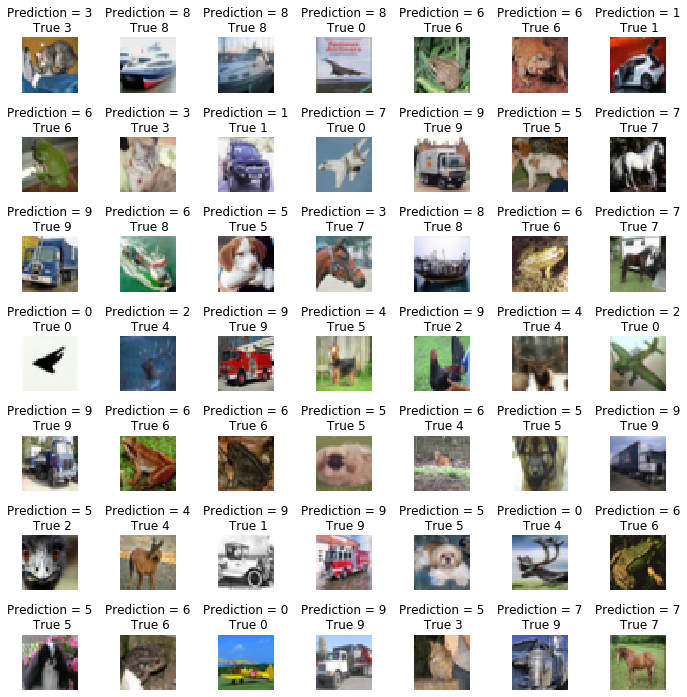

In [30]:
fig,axes = plt.subplots(7,7,figsize=(12,12))
axes = axes.ravel()
for i  in np.arange(0,49):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True {}'.format(predicted_class[i] , y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.8)
    

# Confusion matrix

In [31]:
from sklearn import metrics

Text(0.5, 1, 'Confusion matrix')

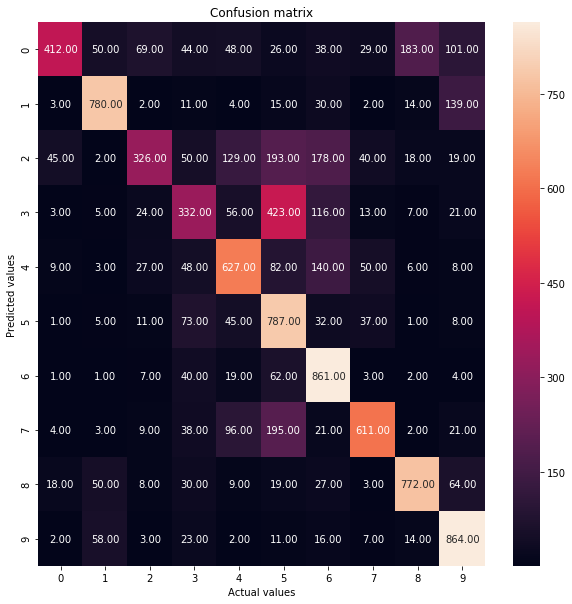

In [33]:
cm = metrics.confusion_matrix(y_test,predicted_class)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.2f')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix')

# Saving model

In [35]:
import os

directory = os.path.join(os.getcwd() , 'saved_models') # saved_models is folder name.

# If there is no directory in the path created above, then create directory and the save model. Else save model directly. 
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory , 'CNN model for image classification.h5')
cnn_model.save(model_path)